In [87]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
import scipy.optimize
from matplotlib import cm

Rules:
- Open book, open notes, open google, open wolfram alpha. No chat no forum post.
- 8 Problem 100 each.
- Full score = 720.
- Comment your code. Write your code with good style.
- For problem 6, 7, 8 there is a +10 bonus for each problem on good coding style.

# 1) Easy Stuff

1.1) Use gaussian elimination to solve the following system of equations. You can do it by hands. No need to implement one. And no do not use np.linalg.solve(only use it for checking answer).

$$
\begin{bmatrix}
1 & -1 & 1 \\
2 & -1 & 3 \\
-1 & 3 & 4 \\
\end{bmatrix}
\begin{bmatrix}
x\\
y \\
z
\end{bmatrix}
=
\begin{bmatrix}
4 \\
17 \\
29
\end{bmatrix}
$$

In [7]:
def forward(A,B):
    newA = A.copy()
    newB = B.copy()
    nrow, ncol = A.shape 
    for pivot_row in range(nrow-1): # 0 - n-1
        for elim_row in range(pivot_row+1, nrow):  
            c = newA[elim_row,pivot_row]/newA[pivot_row,pivot_row]
            newA[elim_row,:] = newA[elim_row,:]-c*newA[pivot_row,:] 
            newB[elim_row] = newB[elim_row]-c*newB[pivot_row]
    return newA, newB

def backward(A,B):
    newA = A.copy()
    newB = B.copy()
    nrow, ncol = A.shape 
    for pivot_row in range(nrow-1,0,-1): 
        for elim_row in range(pivot_row-1,-1,-1):  
            c = newA[elim_row,pivot_row]/newA[pivot_row,pivot_row]
            newA[elim_row,:] = newA[elim_row,:]-c*newA[pivot_row,:] 
            newB[elim_row] = newB[elim_row]-c*newB[pivot_row]
    return newA, newB   

def solve(A,B):
    newA = A.copy()
    newB = B.copy()
    nrow, ncol = A.shape 
    for i in range(nrow):
        newB[i] = newB[i]/newA[i][i]
        newA[i][i] = 1
    return newB  

In [10]:
A = np.array([[1.,-1.,1],
    [2.,-1.,3.],
    [-1.,3.,4.]])
C = np.array([4.,17.,29.])

new_A, new_B = forward(A,C)
A_2, B_2 = backward(new_A,new_B)
ans = solve(A_2,B_2)
print(ans) 
print(np.linalg.solve(A,C))

[ 3.  4.  5.]
[ 3.  4.  5.]


1.2) Random number manipulation. 

Use **np.random.rand()** which generate uniform random real number from 0-1. To generate the following random number generator which generates

1.2.1) A uniform random real number from 63-90

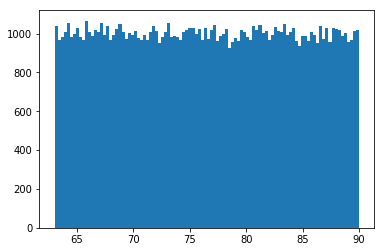

In [13]:
n = 100000
x = np.random.rand(n)*27+63
plt.hist(x,bins=100);

1.2.2) A random ** integer ** which gives -1 40% of the time and  0 20% and 1 40% of the time.

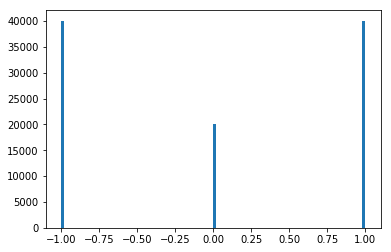

In [12]:
def randomGen():
    x = np.random.rand()
    if x < 0.4:
        return -1 
    elif x < 0.6:
        return 0
    else:
        return 1 

ran = [randomGen() for i in range(100000)]
plt.hist(ran,bins=100);

# 2) System of Non-linear Equations

Find **all solutions** to the following system of non linear equations using Newton's Method given that $x \in [-10,10]$ and $y \in [-10, 10]$
$$x^3 + y^3 = 9.8667 - xy$$
$$y^2  = 2x + 20$$

In [70]:
#give me ALL solutions
def u(x,y):
    return x**3+y**3+x*y-9.8667
def v(x,y):
    return y**2-2*x-20

def udx(x,y):
    return 3*x**2+y

def udy(x,y):
    return x+3*y**2

def vdx(x,y):
    return -2 

def vdy(x,y):
    return 2*y

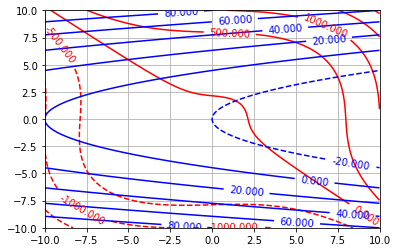

In [71]:
nx = 200
ny = 200
x = np.linspace(-10,10,nx)
y = np.linspace(-10,10,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) 
        vz[iy,ix] = v(xx,yy)

ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

-3.10212337838 3.71426348597
6.10249390145 -5.67494385901


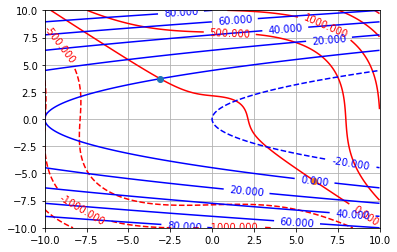

In [74]:
def newton2D(x,y):
    A = np.array([
        [udx(x,y), udy(x,y)],
        [vdx(x,y), vdy(x,y)]
        ])
    
    C = np.array(
    [-u(x,y)+udx(x,y)*x+udy(x,y)*y,
    -v(x,y)+vdx(x,y)*x+vdy(x,y)*y])   
    
    return np.linalg.solve(A,C)  

def solveNewton2d(x,y):
    for i in range(5):
        x,y = newton2D(x,y)     
    return x,y

ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

x1, y1 = solveNewton2d(-2.5,3)
x2, y2 = solveNewton2d(6,-5)
print(x1, y1)
print(x2, y2)
plt.plot(x1, y1,'o')
plt.plot(x2, y2,'o')

# 3) Gradient Descent.

3.1) (70) Implement a gradient descent method to find the **minimum** location of the following function. Note that You ** must ** use analytic gradient.

$$f(x,y) = (x-1)^4 + (x-y)^4 + (y-2)^4 - 10 $$

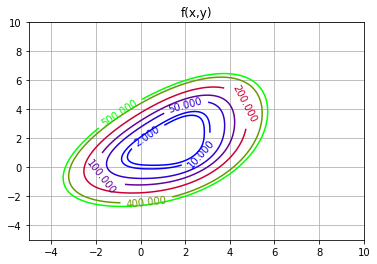

In [79]:
def f(x,y):
    return (x-1)**4+(x-y)**4+(y-2)**4-10
nx = 200
ny = 200
x = np.linspace(-5,10,nx)
y = np.linspace(-5,10,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

[ 1.3307388  1.6692612]


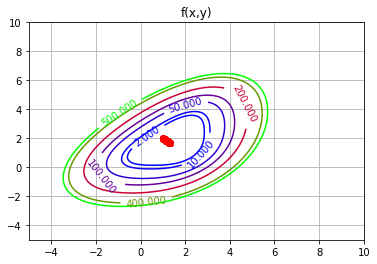

In [83]:
def gradientf(v):
    x, y = v
    return np.array([4*((x-y)**3+(x-1)**3),4*(y - 2)**3 - 4*(x - y)**3])      #dx, dy

v = (1,2)
lmd = 0.001
for i in range(1000):
    v = v-lmd*(gradientf(v))
    plt.plot(v[0],v[1],'o',color='red')
        
ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')
print(v)

3.2) (30) Answer the following questions.

3.2.1) Does Gradient Descent guarantee to converge to absolute minimum?


no 

3.2.2) What is wrong with large learning rate($\lambda$)?


converge too fast and it will over step . 

3.2.3) What is wrong with small learning rate($\lambda$)?

converge too slow 

# 4) Linear Regression

Suppose that we want to fit the following data with the function
$$
f(x) = A \sin(x) + B x + C 
$$
for some value of $A$, $B$ and $C$

Find $A$, $B$ and $C$ that gives you the best fit.

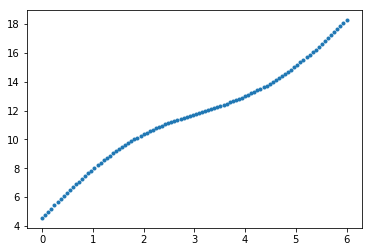

In [85]:
xs = xs = np.linspace(0,6,100)
ys = np.array([  4.56      ,   4.77631801,   4.99236246,   5.20786079,
         5.42254245,   5.63613989,   5.84838954,   6.05903277,
         6.26781686,   6.47449592,   6.67883177,   6.88059486,
         7.07956506,   7.27553253,   7.46829841,   7.65767565,
         7.84348959,   8.02557869,   8.20379507,   8.37800508,
         8.54808979,   8.71394539,   8.87548362,   9.03263207,
         9.18533445,   9.33355078,   9.47725759,   9.61644793,
         9.75113145,   9.88133434,  10.00709927,  10.12848518,
        10.24556709,  10.35843583,  10.46719772,  10.57197412,
        10.67290105,  10.77012868,  10.86382072,  10.9541539 ,
        11.04131728,  11.12551153,  11.20694826,  11.28584918,
        11.36244533,  11.4369762 ,  11.50968885,  11.58083706,
        11.65068031,  11.7194829 ,  11.78751294,  11.85504137,
        11.92234098,  11.98968541,  12.05734812,  12.12560141,
        12.1947154 ,  12.26495706,  12.33658922,  12.4098696 ,
        12.48504987,  12.56237473,  12.64208098,  12.7243967 ,
        12.80954039,  12.89772014,  12.98913293,  13.08396383,
        13.18238539,  13.28455695,  13.39062409,  13.5007181 ,
        13.61495545,  13.73343744,  13.85624974,  13.98346214,
        14.11512829,  14.25128545,  14.39195442,  14.53713941,
        14.68682806,  14.84099147,  14.99958431,  15.16254498,
        15.32979585,  15.50124353,  15.67677922,  15.85627912,
        16.03960485,  16.226604  ,  16.41711067,  16.61094608,
        16.80791921,  17.00782755,  17.21045779,  17.41558662,
        17.62298157,  17.83240185,  18.04359923,  18.25631894])
plt.plot(xs,ys,'.');

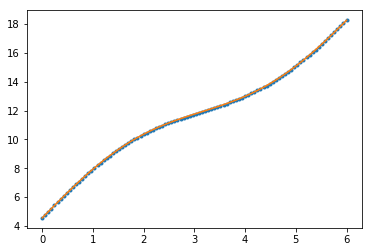

In [88]:
def cost(w):
    A, B, C = w 
    return np.sum(((A*np.sin(xs)+B*xs+C)-ys)**2)

plt.plot(xs,ys,'.');
res = scipy.optimize.minimize(cost,[1.,1.,1.])
A,B,C = res.x 
plt.plot(xs,A*np.sin(xs)+B*xs+C)

# 5) Monte Carlo Integration

5.1) Evaluate the following integral using Monte Carlo method.

$$ \iiint \limits_C e^{-x^2 + 2y - z} \; dx \; dy \; dz$$

where $C$ is a sphere of radius 2 centered at $(1,2,3)$

In [244]:
n = 100000
x = np.random.random(n)*4-1      #[-1,3]
y = np.random.random(n)*4        #[0,4]
z = np.random.random(n)*4+1      #[1,5]

def f(x,y,z):
    return math.exp(-x**2+2*y-z)

ans = sum([f(x,y,z)*64./n for x,y,z in zip(x,y,z) if ((x-1)**2+(y-2)**2+(z-3)**2<=4)])        #x^2+y^2+z^2=r^2 
print(ans) 

201.24775933049756


5.2) Evaluate the following integral

$$ \iint \limits_D \left(\sin(x)+\cos(y)\right)^2 \; dx \; dy$$

where $D$ the red area show in the picture below. It is the **union** of
- circle which centers at (-1.5, 0) with radius 2
- circle which centers at (1, 0) with readius 2

<img src="area.png"/>

In [271]:
def f(x,y):
    return (math.sin(x)+math.cos(y))**2

n =100000
xl = np.random.rand(n)*8-4
yl = np.random.rand(n)*8-4 

xr = np.random.rand(n)*8-4
yr = np.random.rand(n)*8-4 

area = 0
for i in range(n):
    if ((xl[i])**2+yl[i]**2<=4):
        area+= f(xl[i],yl[i])
    elif ((xr[i])**2+yr[i]**2<=4):
        area+= f(xr[i], yr[i])
area*=(8.**2)/n

print(area)

22.47726730208364


# 6) Minimization

11.1 Surround Speakers problem. Nowadays the sound system gets so fancy we even have 11.1 speakers. That's the total of 11 speakers + 1 subwoofer.

Given this many speakers one problem that becomes less trivial is the delay between speakers. We want to hear the sound from all the speaker at the same time. Since sound travel at constant speed in air, we will hear from the speaker that is **nearest** to us first and the **furthest** speaker last. If these **two distances** are **too different**, the listener would get confused.

Placing a speaker in a cicular manner would have solved this problem but that would ruins all the interior design. So we will fix where the speakers are but we will change where we sit instead.

So the goal for this problem is to figure out where we should sit so we can hear sound from all speaker **at the same time as much as possible**. In other words, the distance from all speakers should be as equal as possible.

Be sure to justify your cost functions.

This is a semi-openended problem. Anything sensible goes. Be careful about starting position.

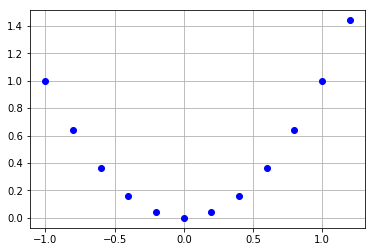

In [287]:
from scipy.optimize import minimize
# theta = np.linspace(0,6,12)
# xs = np.cos(theta) + np.linspace(0,2,12)
# ys = np.sin(theta) - np.linspace(0,2,12)
tmp = np.linspace(-1,1.2,12)
xs = tmp
ys = xs**2
plt.plot(xs, ys, 'ob')
plt.grid(True)

In [295]:
print(min(xs))
print(ys)

-1.0
[ 1.    0.64  0.36  0.16  0.04  0.    0.04  0.16  0.36  0.64  1.    1.44]


(0.00580364262870714, 1.215374115395911)


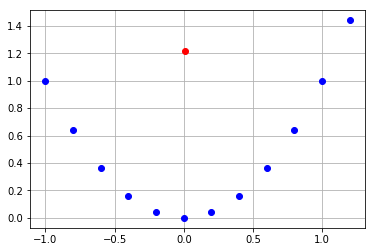

In [342]:
def cost(point):  
    x, y = point
    distance = []    
    for i in range(len(xs)):
        dist = math.sqrt((x-xs[i])**2+(y-ys[i])**2)
        distance.append(dist)   
    min_dist = min(distance)
    max_dist = max(distance)
    return abs(min_dist-max_dist)

curr_point = (1.,1.)
curr_avg = cost(curr_point)
for i in range(100000):
    x = np.random.rand()*2-1
    y = np.random.rand()*1.4
    new_point = (x,y)
    new_avg = cost(new_point)
    if new_avg < curr_avg:
        curr_avg = new_avg
        curr_point = new_point
        
print(curr_point)
x, y = curr_point

plt.plot(xs, ys, 'ob')
plt.plot(x,y,'or')
plt.grid(True)

# 7) Monte Carlo Simulations.

Consider a dice game between two person.

 - Each person throw a dice two times.
 - If the results of the two dices are different. The score is calculated by the sum. Eg. $(5,6) \to 5+6 = 11$
 - If the results of the two dices are the same. The score is 5 times the sum of the two. Eg. $(1,1) \to 5 \times(1+1) = 10$
 
 You are presented with 2 dices.
  - A standard 6 sided fair dice. Faces are 1,2,3,4,5,6.
  - A fair dice 6 sided dice. Faces are 1,2,3,1,2,3. Hoping for higher chance of getting bonus.
  
Which dice has higher probability of winning?

In [222]:
def std_dice():
    faces = [1,2,3,4,5,6]
    i = np.random.randint(6)
    return faces[i]

def dice():
    faces = [1,2,3,1,2,3]
    i = np.random.randint(6)
    return faces[i]

def cal_score(sc):
    score = 0
    if sc[0] == sc[1]:
        score = 5*sum(sc)
    else:
        score = sum(sc)
    return score 
        
def dice_game():
    win = 0
    pp = [std_dice(),std_dice()]
    lm = [dice(),dice()]    
    score_pp = cal_score(pp)
    score_lm = cal_score(lm) 
    if score_pp > score_lm:
        win+= 1 
    return win  

def dice_game2():
    win = 0
    pp = [dice(),dice()]  
    lm = [std_dice(),std_dice()]   
    score_pp = cal_score(pp)
    score_lm = cal_score(lm) 
    if score_pp > score_lm:
        win+= 1 
    return win  

dice_1 = 0
dice_2 = 0
for i in range(500000):
    dice_1 += dice_game()
    dice_2 += dice_game2()
    
print("dice_1 ", dice_1/500000)          #standard dice 
print("dice_2 ", dice_2/500000)

dice_1  0.623892
dice_2  0.310364


standard has higher probability of winning 

# 8) <span style="color:#bc47bc">Couple</span><span style="color:#515489">Maker</span>

Gift saw Ply business going well. She wants to make money too. She decides to stop playing Widowmaker on Overwatch and build a startup matchmaking service called <span style="color:#bc47bc">Couple</span><span style="color:#515489">Maker</span>. 

Her clients consists of equal amount of male and female.

Everyone get to look at the profile of everyone of the opposite sex and put down the number on how much he/she is willing to pay if <span style="color:#bc47bc">Couple</span><span style="color:#515489">Maker</span> match he/she to that person.

To illustrate, let us consider if there are 4 person: M1, M2, F1 and F2. Where the prefix M indicates male and F indicates female.
 - M1 see the profile of F1 and F2 and decide to write down 5 Dollars for F1 and 10 Dollars for F2.
 - M2 see the profile of F1 and F2 and decide to write down 7 Dollars for F1 and 20 Dollars for F2.
 - F1 see the profile of M1 and M2 and decide to write down 12 Dollars for M1 and 2 Dollars for M2.
 - F2 see the profile of M1 and M2 and decide to write down 15 Dollars for M1 and 1 Dollar for M2.

Suppose that <span style="color:#bc47bc">Couple</span><span style="color:#515489">Maker</span> system match (M1 with F1) and (M2 with F2). Then the company will receive payment of

- 5 Dollars from M1
- 12 Dollars from F1
- 20 Dollars from M2
- 1 Dollar from F2

which gives the total of 38$.

## The Problem

Gift has 50 male clients and 50 female clients and she wants to **maximize** the revenue. The amount of money are willing to pay each depending whom they got matched with is given in matrix $rfm$(rating from male) and $rff$(rating from remale)

- ```rfm[m, f]``` is how much male $m$ would pay if he is matched with female $f$
- ```rff[f, m]``` is how much a female $f$ would pay if she is matched with male $m$

Use Hill climbing to help Gift maximize the revenue by finding out who should be match with whom.











In [146]:
# np.random.seed(100)
# rfm = np.random.randn(50,50)**2 *100
# rff = np.random.randn(50,50)**2 *50 + 50
# np.savetxt('rfm.txt', rfm)
# np.savetxt('rff.txt', rff)
rfm = np.loadtxt('rfm.txt')
rff = np.loadtxt('rff.txt')

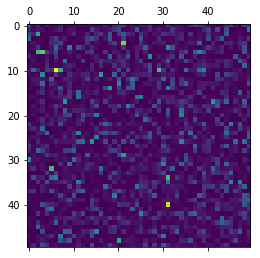

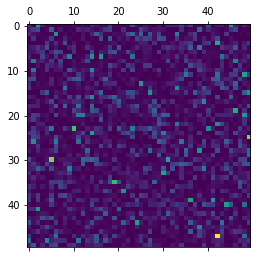

In [147]:
plt.matshow(rfm)
plt.matshow(rff)

In [223]:
def cal_revenue(matches):
    rev = 0 
    for match in matches: 
        M = match[0]
        F = match[1]
        rev+= rfm[M,F]
        rev+= rff[F,M]
    return rev 

def change_match(matches):
    new_match = matches.copy()
    i = np.random.randint(50)
    j = np.random.randint(50)
    m_1 = new_match[i]
    m_2 = new_match[j]
    M1 = m_1[0]
    F1 = m_1[1]
    M2 = m_2[0]
    F2 = m_2[1]
    new_match[i] = M2,F1
    new_match[j] = M1,F2
    return new_match

def max_revenue(matches):
    curr_matches = matches.copy()
    curr_revenue = cal_revenue(curr_matches)
    for i in range(10000):
        new_match = change_match(curr_matches)
        new_revenue = cal_revenue(new_match)
        if new_revenue > curr_revenue:
            curr_revenue = new_revenue
            curr_matches = new_match
    return curr_matches, curr_revenue

matches = []
for i in range(50):
    pair = (i,i)
    matches.append(pair)
    
matches, profit = max_revenue(matches)
print(profit)

36725.8273983
